# Classificador de AVC
 - A entrada será dados de vários pacientes
 - O modelo deve retornar se ele teve AVC ou não
 - Os dados estão disponíveis no Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Passos:
 - Preparar dados para uso
   - Ler
   - Limpar
   - Separar
   - Normalizar
 - Plotar informações para ganhar insights
 - Utilizar um classificador
 - Criar um pipeline (opcional)
 - Utilizar validação cruzada



## Importando libs

In [363]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

In [364]:
warnings.filterwarnings('ignore')

## Carregando e visualizando os dados

In [365]:
# Carregando os dados
df = pd.read_csv('./data/healthcare-dataset-stroke-data.csv', delimiter = ',', encoding = 'utf-8')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [366]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [368]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [369]:
# stats of categorical data
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## Tratando dados faltantes

In [370]:
# There are null values present in 'bmi'
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [371]:
# handling missing values
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [372]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Explorando os dados

In [373]:
def piedist(data, column, labels):
    """
    Plots the distribution percentage of a categorical column
    in a pie chart.
    """
    dist = data[column].value_counts()
    colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99', '#be99ff']
    plt.pie(x = dist, labels = labels, autopct = '%1.2f%%', pctdistance = 0.5, colors = colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

stroke:  249
no_stroke:  4861


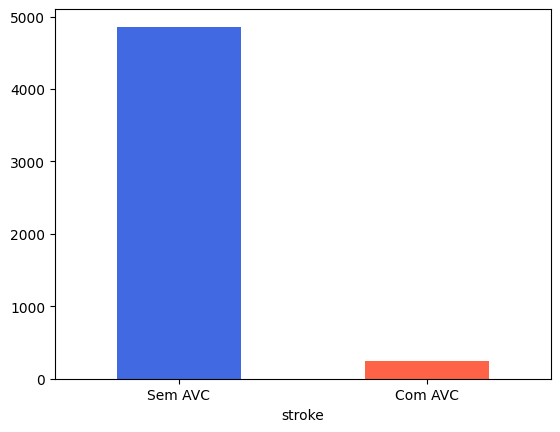

In [374]:
st_plot = df["stroke"].value_counts().plot(kind = "bar", color = ['#4169E1', '#FF6347'], rot = 0)
plt.xticks(ticks = [1,0], labels = ["Com AVC", "Sem AVC"]);
print('stroke: ', sum(df['stroke'] == 1))
print('no_stroke: ', sum(df['stroke'] == 0))

Temos um número muito baixo de pessoas que sofreram acidente vascular cerebral. Isso também significa que nosso conjunto de dados está desequilibrado. Provavelmente teremos que usar técnicas de amostragem para equilibrar os dados.

### Como o IMC se relaciona com o AVC?

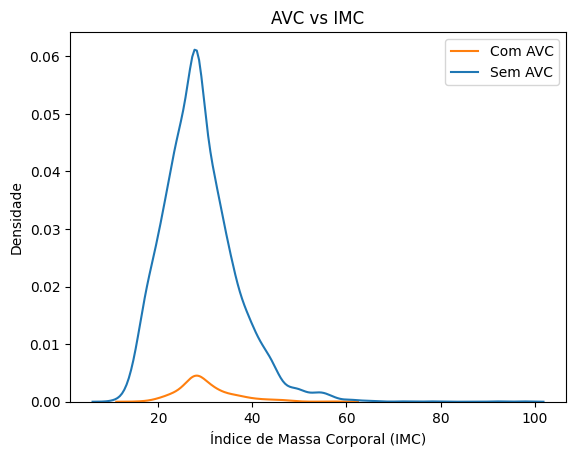

In [375]:
ax = sns.kdeplot(data=df, x='bmi', hue='stroke')
ax.set_xlabel('Índice de Massa Corporal (IMC)')
ax.set_ylabel('Densidade')
plt.title('AVC vs IMC')
plt.legend(['Com AVC', 'Sem AVC'])

# IMC não tem efeito sério no AVC.

### Como o gênero se relaciona com o AVC?

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

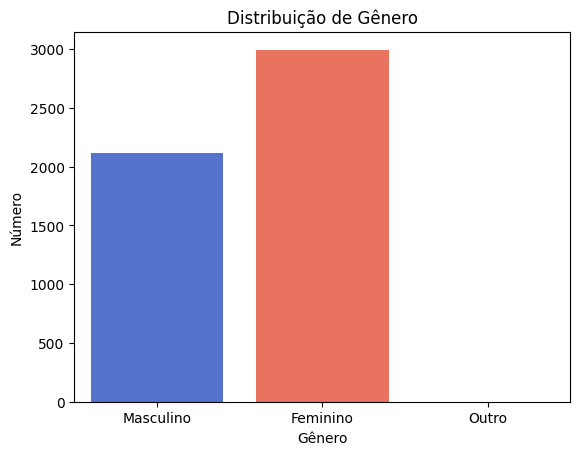

In [376]:
colors = {'Masculino': '#4169E1', 'Feminino': '#FF6347', 'Outro': 'green'}
ax = sns.countplot(x=df['gender'], palette=colors.values())
ax.set_xlabel('Gênero')
ax.set_ylabel('Número')
ax.set_title('Distribuição de Gênero')
ax.set_xticklabels(['Masculino', 'Feminino', 'Outro'])
df['gender'].value_counts()

In [377]:
# Número de pessoas com gênero "Other"
(df['gender'] == 'Other').sum()

1

In [378]:
# Só existe uma pessoa com gênero diferente, podemos limpar esse dado
df.drop(df[df['gender'] == 'Other'].index, axis = 0, inplace = True)

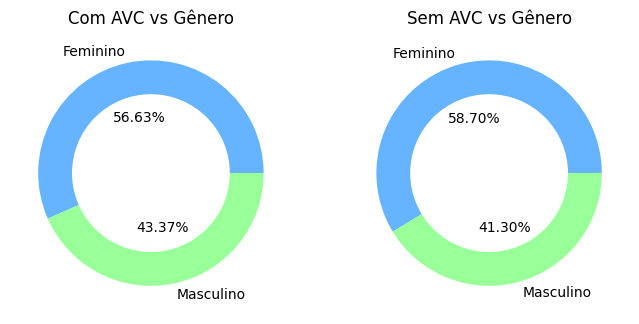

In [379]:
fig = plt.figure(figsize = (8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Com AVC vs Gênero')
piedist(data=df[df['stroke'] == 1], column='gender', labels=['Feminino', 'Masculino'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('Sem AVC vs Gênero')
piedist(data=df[df['stroke'] == 0], column='gender', labels=['Feminino', 'Masculino'])

### Como a idade se relaciona com o AVC?

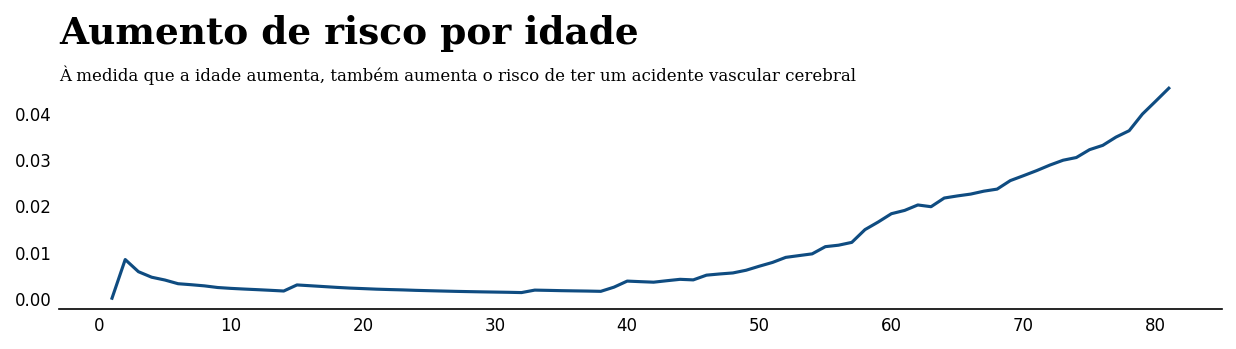

In [380]:
fig = plt.figure(figsize = (10, 5), dpi = 150)
gs = fig.add_gridspec(2, 1)
gs.update(wspace = 0.11, hspace = 0.5)
ax0 = fig.add_subplot(gs[0, 0])


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data = rate, color = '#0f4c81', ax = ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis = 'both', which = 'major', labelsize = 8)
ax0.tick_params(axis = 'both', which = 'major', length = 0)

ax0.text(-3,0.055, 'Aumento de risco por idade', fontsize = 18, fontfamily = 'serif', fontweight = 'bold')
ax0.text(-3,0.047, 'À medida que a idade aumenta, também aumenta o risco de ter um acidente vascular cerebral', fontsize = 8, fontfamily = 'serif')
plt.show()

### Como a doença cardíaca se relaciona com o acidente vascular cerebral?

Text(0, 0.5, 'Número')

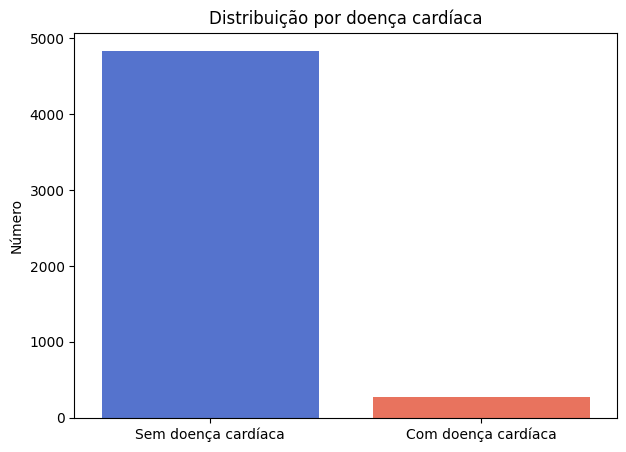

In [381]:
fig, ax = plt.subplots(figsize = (7, 5))
colors = {'Sem doença cardíaca': '#4169E1', 'Com doença cardíaca': '#FF6347'}
ax = sns.countplot(x = df['heart_disease'], palette=colors.values());
ax.set_title('Distribuição por doença cardíaca')
ax.set_xticklabels(['Sem doença cardíaca', 'Com doença cardíaca'])
ax.set_xlabel('')
ax.set_ylabel('Número')

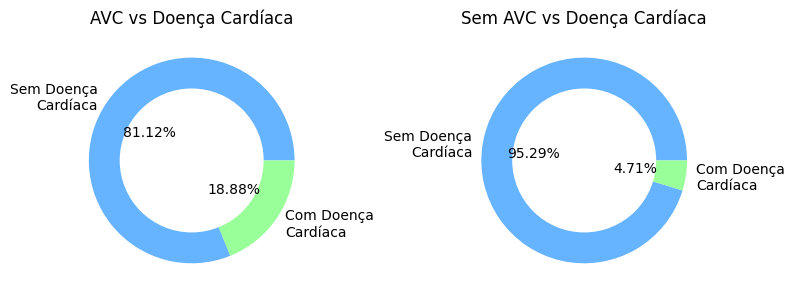

In [382]:
fig = plt.figure(figsize = (8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
ax.set_title('AVC vs Doença Cardíaca')
piedist(data=df[df['stroke'] == 1], column='heart_disease', labels=['Sem Doença\nCardíaca', 'Com Doença\nCardíaca'])

ax = plt.subplot2grid((1, 2), (0, 1))
ax.set_title('Sem AVC vs Doença Cardíaca')
piedist(data=df[df['stroke'] == 0], column='heart_disease', labels=['Sem Doença\nCardíaca', 'Com Doença\nCardíaca'])

plt.tight_layout()

### Tipo de trabalho

Text(0, 0.5, 'Número')

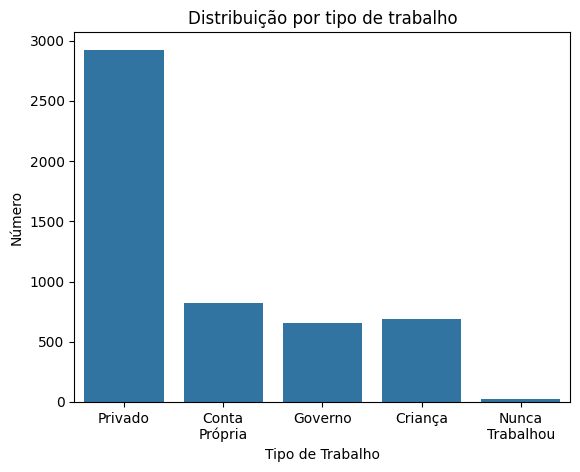

In [383]:
ax = sns.countplot(data = df, x = 'work_type');
ax.set_title('Distribuição por tipo de trabalho')
ax.set_xticklabels(['Privado', 'Conta\nPrópria', 'Governo', 'Criança', 'Nunca\nTrabalhou'])
ax.set_xlabel('Tipo de Trabalho')
ax.set_ylabel('Número')

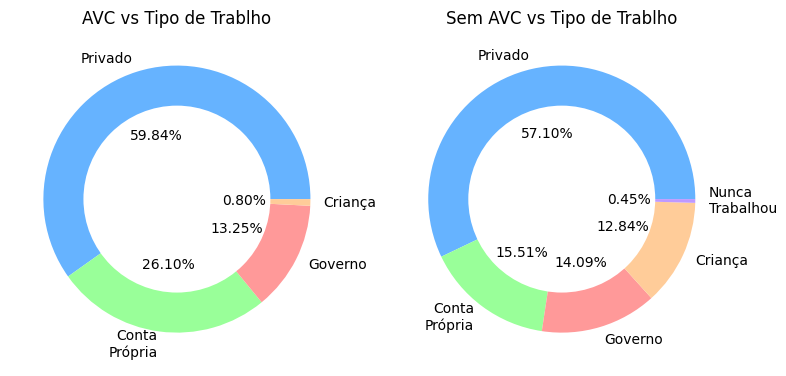

In [384]:
fig = plt.figure(figsize = (8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('AVC vs Tipo de Trablho')
piedist(data=df[df['stroke'] == 1], column='work_type', labels=['Privado', 'Conta\nPrópria', 'Governo', 'Criança'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('Sem AVC vs Tipo de Trablho')
piedist(data=df[df['stroke'] == 0], column='work_type', labels=['Privado', 'Conta\nPrópria', 'Governo', 'Criança', 'Nunca\nTrabalhou'])

plt.tight_layout()

### Tipo de residência

Text(0, 0.5, 'Número')

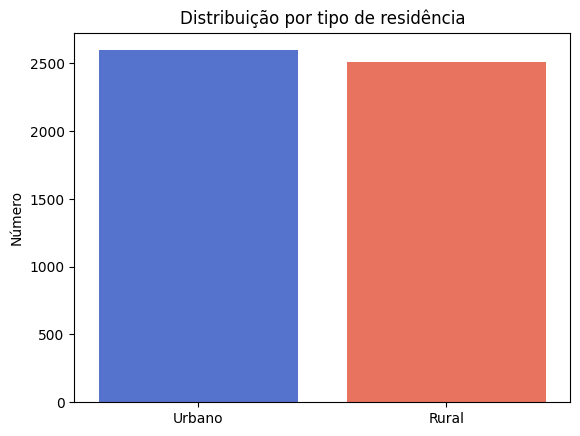

In [385]:
colors = ['#4169E1', '#FF6347']
ax = sns.countplot(x = df['Residence_type'], palette=colors)
ax.set_title('Distribuição por tipo de residência')
ax.set_xticklabels(['Urbano', 'Rural'])
ax.set_xlabel('')
ax.set_ylabel('Número')

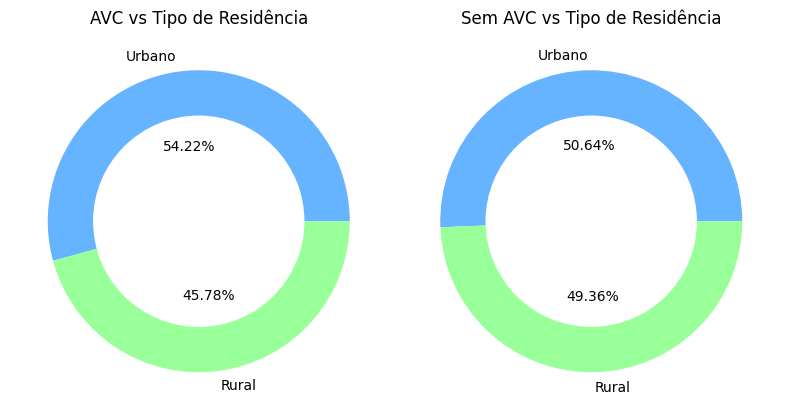

In [386]:
fig = plt.figure(figsize = (8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('AVC vs Tipo de Residência')
piedist(data=df[df['stroke'] == 1], column='Residence_type', labels=['Urbano', 'Rural'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('Sem AVC vs Tipo de Residência')
piedist(data=df[df['stroke'] == 0], column='Residence_type', labels=['Urbano', 'Rural'])

plt.tight_layout()

### Condição de fumante

Text(0, 0.5, 'Número')

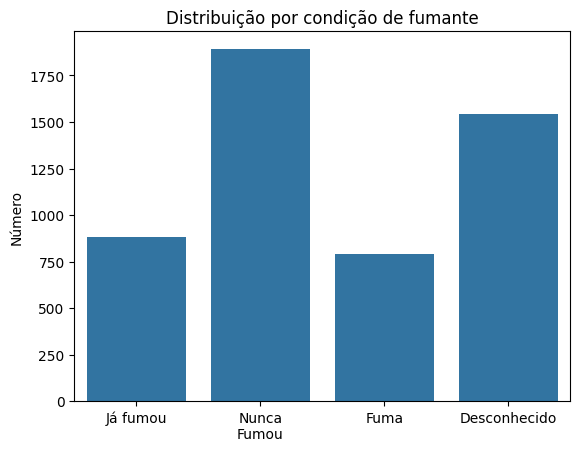

In [387]:
ax = sns.countplot(data = df, x = 'smoking_status')
ax.set_title('Distribuição por condição de fumante')
ax.set_xticklabels(['Já fumou', 'Nunca\nFumou', 'Fuma', 'Desconhecido'])
ax.set_xlabel('')
ax.set_ylabel('Número')

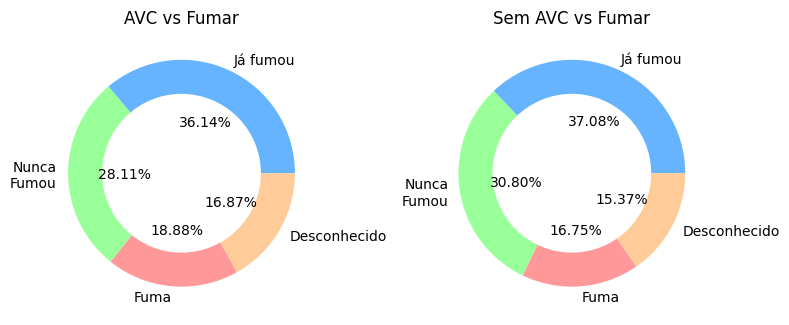

In [388]:
fig = plt.figure(figsize = (8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('AVC vs Fumar')
piedist(data=df[df['stroke'] == 1], column='smoking_status', labels=['Já fumou', 'Nunca\nFumou', 'Fuma', 'Desconhecido'])

ax = plt.subplot2grid((1, 2), (0, 1))
plt.title('Sem AVC vs Fumar')
piedist(data=df[df['stroke'] == 0], column='smoking_status', labels=['Já fumou', 'Nunca\nFumou', 'Fuma', 'Desconhecido'])

plt.tight_layout()

## Trabalhando em cima dos atributos

In [389]:
df = df.drop(['id'], axis = 1)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Tratando dados categóricos com `LabelEncoder`:

In [390]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])                       # Female = 0, male = 1
df['ever_married'] = le.fit_transform(df['ever_married'])           # No = 0, yes = 1
df['work_type'] = le.fit_transform(df['work_type'])                 #  Govt_job = 0, Government = 1, private = 2, self-employed = 3, children = 4
df['Residence_type']= le.fit_transform(df['Residence_type'])        # Rural = 0, urban = 1
df['smoking_status'] = le.fit_transform(df['smoking_status'])       # unknow = 0, formerly smoked = 1, never_smoke = 2, smokes = 3

Normalizando dados numéricos:

In [391]:
mms = MinMaxScaler()
df['age'] = mms.fit_transform(df['age'].values.reshape(-1, 1))
df['avg_glucose_level'] = mms.fit_transform(df['avg_glucose_level'].values.reshape(-1, 1))
df['bmi'] = mms.fit_transform(df['bmi'].values.reshape(-1, 1))

Verificando a correlação entre os atributos:

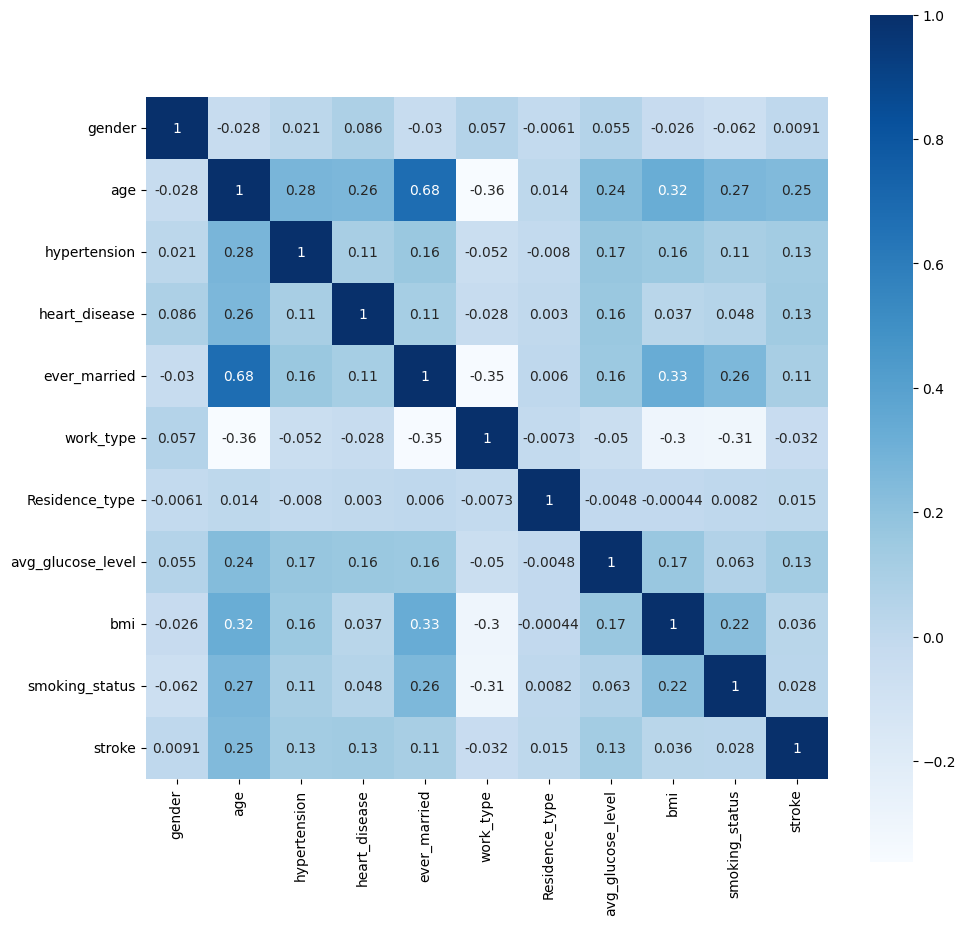

In [420]:
correlation = df.corr(method = 'pearson')

fig = plt.subplots(figsize = (11,11))
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'Blues');


In [393]:
# The dataset has been cleaned
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.817073,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743902,0,0,1,3,0,0.679023,0.203895,2,1
2,1,0.975610,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597561,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963415,1,0,1,3,0,0.549349,0.156930,2,1


In [394]:
x = df.drop(['stroke'], axis = 1).values
y = df['stroke']

In [395]:
# Tratando o problema de dados desbalanceados com SMOTE que gera dados sintéticos para balancear os dados
smote = SMOTE(random_state = 3)
x_smote, y_smote = smote.fit_resample(x, y)

Dados após balanceamento:
Com AVC:  4860
Sem AVC:  4860


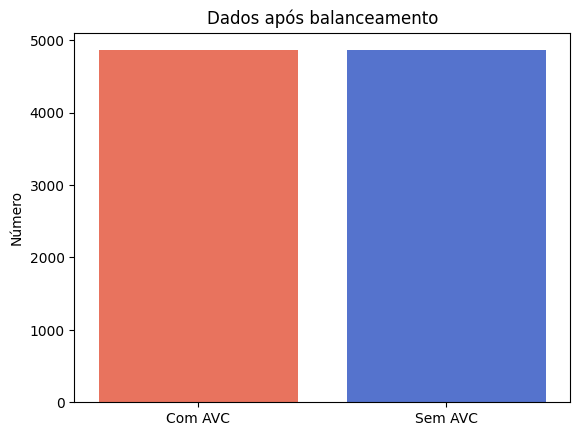

In [396]:
colors = ['#FF6347', '#4169E1']

ax = sns.countplot(x=y_smote, palette=colors)
ax.set_title('Dados após balanceamento')
ax.set_xticklabels(["Com AVC", "Sem AVC"])
ax.set_xlabel('')
ax.set_ylabel('Número')

print('Dados após balanceamento:')
print('Com AVC: ', sum(y_smote == 1))
print('Sem AVC: ', sum(y_smote == 0))

Dividindos os dados entre treino e teste:

In [397]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7776, 10) (1944, 10) (7776,) (1944,)


Com AVC:  3892
Sem AVC:  3884


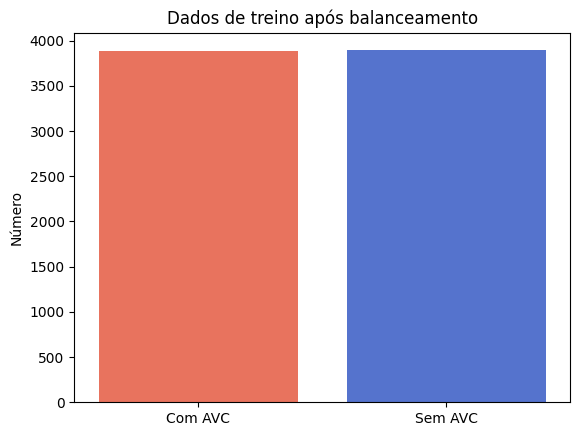

In [398]:
colors = ['#FF6347', '#4169E1']

ax = sns.countplot(x = y_train, palette=colors)
ax.set_title('Dados de treino após balanceamento')
ax.set_xticklabels(["Com AVC", "Sem AVC"])
ax.set_xlabel('')
ax.set_ylabel('Número')

print('Com AVC: ', sum(y_train == 1))
print('Sem AVC: ', sum(y_train == 0))

Com AVC:  968
Sem AVC:  976


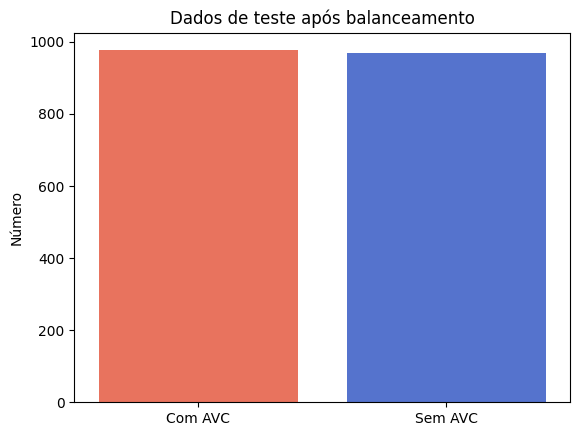

In [399]:
colors = ['#FF6347', '#4169E1']

ax = sns.countplot(x = y_test, palette=colors)
ax.set_title('Dados de teste após balanceamento')
ax.set_xticklabels(["Com AVC", "Sem AVC"])
ax.set_xlabel('')
ax.set_ylabel('Número')

print('Com AVC: ', sum(y_test == 1))
print('Sem AVC: ', sum(y_test == 0))

## Aplicando algoritmos de ML

Finalmente podemos escolher um modelo e treiná-lo a partir dos nossos dados.

São exemplos de modelos de classificação:
- `SVC`
- `DecisionTreeClassifier`
- `AdaBoostClassifier`
- `RandomForestClassifier`
- `GradientBoostingClassifier`
- `KNeighborsClassifier`
- `LogisticRegression`

### REGRESSÃO LOGÍSTICA

In [400]:
model = LogisticRegression()

# Testando valores
param_grid = {
    'C': [5, 10, 50, 100, 300], 
    'max_iter': [30, 50, 80, 100, 200]
}

In [401]:
# cv é o numero de folders
log_reg = GridSearchCV(model, param_grid, cv = 5)
log_reg.fit(x_train, y_train)

print(log_reg.best_params_)
log_reg = log_reg.best_estimator_

{'C': 5, 'max_iter': 30}


In [402]:
# Fazendo validação cruzada
score = cross_val_score(log_reg, x_train, y_train, cv = 5, scoring = 'accuracy')
score

array([0.78663239, 0.77106109, 0.78906752, 0.77877814, 0.8       ])

In [403]:
# fazendo predição dos dados de teste
y_pred = log_reg.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       976
           1       0.77      0.82      0.79       968

    accuracy                           0.79      1944
   macro avg       0.79      0.79      0.79      1944
weighted avg       0.79      0.79      0.79      1944

0.786522633744856


In [404]:
# predição probabilística
predicted_probab_log = log_reg.predict_proba(x_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

auc = roc_auc_score(y_test, predicted_probab_log)

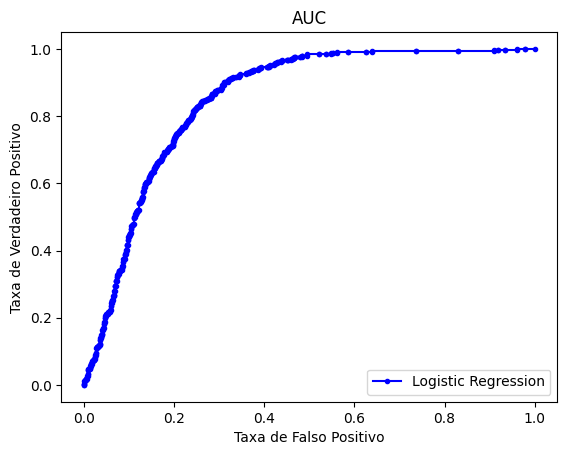

AUC Score:  0.8481563727814658


In [405]:
# Plotando a ROC
plt.plot(fpr, tpr, marker = '.', color = 'Blue', label = 'Logistic Regression')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('AUC')   
plt.legend(loc = 4)
plt.show()
print('AUC Score: ', auc)

Text(0.5, 1.0, 'Matriz de Confusão (Valores e Porcentagens)')

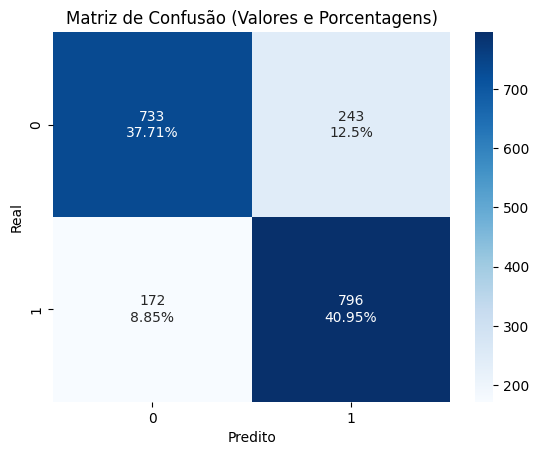

In [406]:
#matriz de confusão
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Real'], colnames = ['Predito'])
# Calcular as porcentagens
total_sum = confusion_matrix.to_numpy().sum()
percentages = (confusion_matrix / total_sum * 100).round(2).astype(str) + '%'

# Combinar valores e porcentagens em uma única string
combined = confusion_matrix.astype(str) + '\n' + percentages

# Plotar a matriz de confusão com valores e porcentagens
sns.heatmap(confusion_matrix, annot=combined, cmap='Blues', fmt='')
plt.title('Matriz de Confusão (Valores e Porcentagens)')

### SVC

In [407]:
SVC_model = SVC(kernel = 'rbf', C = 5, gamma = 0.25, probability = True)
# da mesma forma que que foi feito para o modelo anterior
score = cross_val_score(SVC_model, x_train, y_train, cv = 5, scoring = 'accuracy')
score

array([0.84768638, 0.84501608, 0.85209003, 0.85144695, 0.86688103])

In [408]:
SVC_model.fit(x_train,y_train)
y_pred_SVC = SVC_model.predict(x_test)

print(classification_report(y_pred_SVC, y_test))
print(accuracy_score(y_pred_SVC, y_test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       855
           1       0.91      0.81      0.86      1089

    accuracy                           0.85      1944
   macro avg       0.85      0.86      0.85      1944
weighted avg       0.86      0.85      0.85      1944

0.852366255144033


Vemos uma melhora em relação a Regressão Logística!

In [409]:
predicted_probab_SVC = SVC_model.predict_proba(x_test)
predicted_probab_SVC = predicted_probab_SVC[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_SVC)

auc_SVC = roc_auc_score(y_test, predicted_probab_SVC)

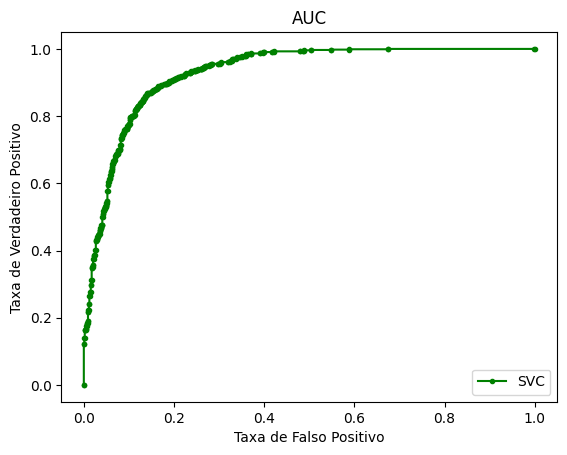

AUC Score:  0.929292694079393


In [410]:
plt.plot(fpr, tpr, marker = '.', color = 'Green', label = 'SVC')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('AUC')   
plt.legend(loc = 4)
plt.show()
print('AUC Score: ', auc_SVC)

Text(0.5, 1.0, 'Matriz de Confusão (Valores e Porcentagens)')

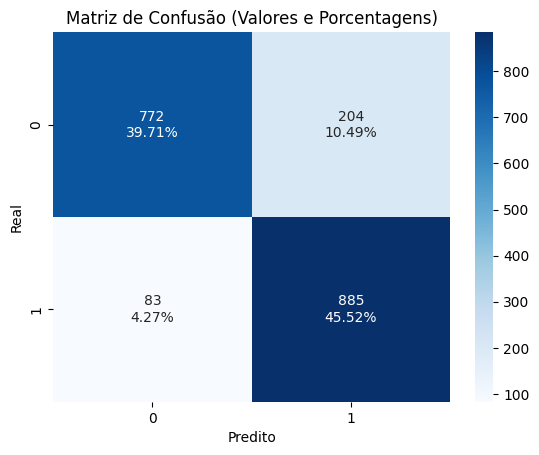

In [411]:
confusion_matrix = pd.crosstab(y_test, y_pred_SVC, rownames = ['Real'], colnames = ['Predito'])

# Calcular as porcentagens
total_sum = confusion_matrix.to_numpy().sum()
percentages = (confusion_matrix / total_sum * 100).round(2).astype(str) + '%'

# Combinar valores e porcentagens em uma única string
combined = confusion_matrix.astype(str) + '\n' + percentages

# Plotar a matriz de confusão com valores e porcentagens
sns.heatmap(confusion_matrix, annot=combined, cmap='Blues', fmt='')
plt.title('Matriz de Confusão (Valores e Porcentagens)')

### RANDOM FOREST

In [412]:
RF_model = RandomForestClassifier(random_state = 3)
score = cross_val_score(RF_model, x_train, y_train, cv = 5, scoring = 'accuracy')
score

array([0.93059126, 0.91768489, 0.92926045, 0.93054662, 0.93826367])

In [413]:
RF_model.fit(x_train, y_train)
y_pred_RF = RF_model.predict(x_test)

print(classification_report(y_test, y_pred_RF))
print(accuracy_score(y_pred_RF, y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       976
           1       0.92      0.97      0.94       968

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.95      0.94      0.94      1944

0.9434156378600823


Melhorou ainda mais em relação ao *SVC*!

In [414]:
predicted_probab_RF = RF_model.predict_proba(x_test)
predicted_probab_RF = predicted_probab_RF[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_RF)

auc_RF = roc_auc_score(y_test, predicted_probab_RF)

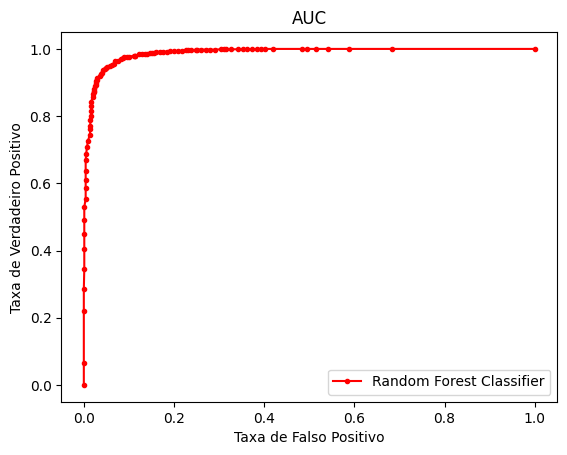

AUC Score:  0.9880124009280585


In [415]:
plt.plot(fpr, tpr, marker = '.', color = 'Red', label = 'Random Forest Classifier')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('AUC')   
plt.legend(loc = 4)
plt.show()
print('AUC Score: ', auc_RF)

Text(0.5, 1.0, 'Matriz de Confusão (Valores e Porcentagens)')

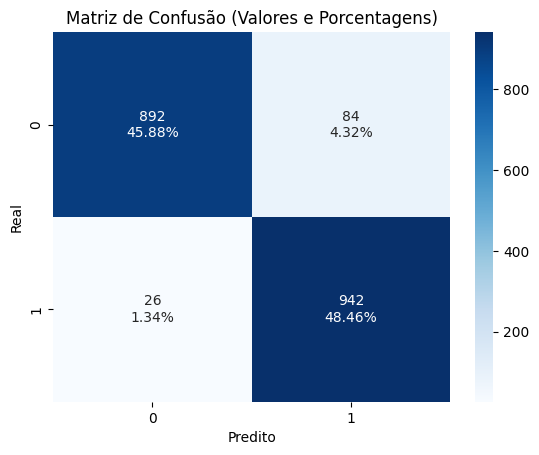

In [416]:
confusion_matrix = pd.crosstab(y_test, y_pred_RF, rownames = ['Real'], colnames = ['Predito'])

# Calcular as porcentagens
total_sum = confusion_matrix.to_numpy().sum()
percentages = (confusion_matrix / total_sum * 100).round(2).astype(str) + '%'

# Combinar valores e porcentagens em uma única string
combined = confusion_matrix.astype(str) + '\n' + percentages

# Plotar a matriz de confusão com valores e porcentagens
sns.heatmap(confusion_matrix, annot=combined, cmap='Blues', fmt='')
plt.title('Matriz de Confusão (Valores e Porcentagens)')

## Comparação dos Resultados

In [417]:
accuracy_logreg = accuracy_score(y_test, y_pred) * 100
accuracy_svc = accuracy_score(y_test, y_pred_SVC) * 100
accuracy_rf = accuracy_score(y_test, y_pred_RF) * 100

print('Pontuação de Acurácia da Regressão Logística:            {:.2f}%'.format(accuracy_logreg))
print('Pontuação de Acurácia do SVC:                            {:.2f}%'.format(accuracy_svc))
print('Pontuação de Acurácia do Classificador Random Forest:    {:.2f}%'.format(accuracy_rf))
print('\n')
print('Pontuação AUC da Regressão Logística:            ', auc)
print('Pontuação AUC do SVC:                            ', auc_SVC)
print('Pontuação AUC do Classificador Random Forest:    ', auc_RF)


Pontuação de Acurácia da Regressão Logística:            78.65%
Pontuação de Acurácia do SVC:                            85.24%
Pontuação de Acurácia do Classificador Random Forest:    94.34%


Pontuação AUC da Regressão Logística:             0.8481563727814658
Pontuação AUC do SVC:                             0.929292694079393
Pontuação AUC do Classificador Random Forest:     0.9880124009280585
